# Unsupervised Learning: Trade&Ahead

**Marks: 50*

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete

from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


import warnings
warnings.filterwarnings("ignore")

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [136]:
data = pd.read_csv("/content/drive/MyDrive/stock_data.csv")

In [137]:
data.shape

(340, 15)

In data,  we have only 340 rows & 15 cols

In [138]:
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines          42.35         10.00        1.69  135   
1        Pharmaceuticals          59.24          8.34        2.20  130   
2  Health Care Equipment          44.91         11.30        1.27   21   
3   Application Software          93.94         13.98        1.36    9   
4         Semiconductors          55.32         -1.83        1.70   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                  668129938.50       3.72      -8.78  
1                 1633015873.00      18.81      -8.75  
2                 1504421769.00      15.28      -0.39  
3                  499643650.80      74.56       4.20  
4                 2247993548.00     178.45       1.06

In [139]:
# let's make a copy of data before manipulating

df = data.copy()

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

as it can be seen, there is no NULL values, & features are 3 data types. Object, float, int

In [141]:
# as we have space betwwen feature name like, Ticker Synbol, we will be modifying with _

df.columns = [c.replace(" ", "_") for c in df.columns]

In [142]:
# lets again look for data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

In [143]:
# also dropping ticker tape, as its onlt required to identify the stock which won't help in any prediction

df.drop("Ticker_Symbol", axis= 1, inplace=True)

In [144]:
# lets do a null check

df.isnull().sum()

Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

no null values

In [145]:
# lets do duplication check

df.duplicated().sum()

0

no duplicates present in data set

In [146]:
# not, let's describe our dataset

df.describe(include = "all").T

count unique  \
Security                        340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                340.00    NaN   
Price_Change                 340.00    NaN   
Volatility                   340.00    NaN   
ROE                          340.00    NaN   
Cash_Ratio                   340.00    NaN   
Net_Cash_Flow                340.00    NaN   
Net_Income                   340.00    NaN   
Earnings_Per_Share           340.00    NaN   
Estimated_Shares_Outstanding 340.00    NaN   
P/E_Ratio                    340.00    NaN   
P/B_Ratio                    340.00    NaN   

                                                             top freq  \
Security                                 American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
P/E_Ratio                                                    NaN  NaN   
P/B_Ratio                                                    NaN  NaN   

                                      mean           std             min  \
Security                               NaN           NaN             NaN   
GICS_Sector                            NaN           NaN             NaN   
GICS_Sub_Industry                      NaN           NaN             NaN   
Current_Price                        80.86         98.06            4.50   
Price_Change                          4.08         12.01          -47.13   
Volatility                            1.53          0.59            0.73   
ROE                                  39.60         96.55            1.00   
Cash_Ratio                           70.02         90.42            0.00   
Net_Cash_Flow                  55537620.59 1946365312.18 -11208000000.00   
Net_Income                   1494384602.94 3940150279.33 -23528000000.00   
Earnings_Per_Share                    2.78          6.59          -61.20   
Estimated_Shares_Outstanding  577028337.75  845849595.42     27672156.86   
P/E_Ratio                            32.61         44.35            2.94   
P/B_Ratio                            -1.72         13.97          -76.12   

                                       25%          50%           75%  \
Security                               NaN          NaN           NaN   
GICS_Sector                            NaN          NaN           NaN   
GICS_Sub_Industry                      NaN          NaN           NaN   
Current_Price                        38.55        59.70         92.88   
Price_Change                         -0.94         4.82         10.70   
Volatility                            1.13         1.39          1.70   
ROE                                   9.75        15.00         27.00   
Cash_Ratio                           18.00        47.00         99.00   
Net_Cash_Flow                -193906500.00   2098000.00  169810750.00   
Net_Income                    352301250.00 707336000.00 1899000000.00   
Earnings_Per_Share                    1.56         2.90          4.62   
Estimated_Shares_Outstanding  158848216.10 309675137.80  573117457.32   
P/E_Ratio                            15.04        20.82         31.76   
P/B_Ratio                            -4.35        -1.07          3.92   

      

* min return of investement is 1% & maximum 917%
* security conpany frequesncy is 1
* 11 unique GICS sector
* average earning per share is 2.78 & goes upto 50
* The average Net_Cash_Flow is $55537620 while median Net_Cash_Flow is $2098000.0 (right skewed, high outliers)
* The average Net_Income is $1494384602.941176 while median Net_Income is $707336000.0 (again right skewed, high outliers)
* The average Earnings_Per_Share is 2.77 while median is 2.895 (left skewed)


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [147]:
# lets write a function to ploy histogram & boxplot

def histogram_boxplot(data, feature, figsize=(12, 7), kde = False, bins = None):
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows = 2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize = figsize
  )
  sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax_hist2,
      bins=bins,
      palette="winter"
  ) if bins else sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(), color = "red", linestyle="--")
  ax_hist2.axvline(
      data[feature].median(), color = "black", linestyle="-")

  sns.boxplot(
      data=data,
      x=feature,
      ax = ax_box2,
      showmeans=True,
      color="green"
  )




In [148]:
#taking all numeriucals columns for analysius

num_cols = df.select_dtypes(include = np.number).columns.tolist();

In [149]:
num_cols[0]

'Current_Price'

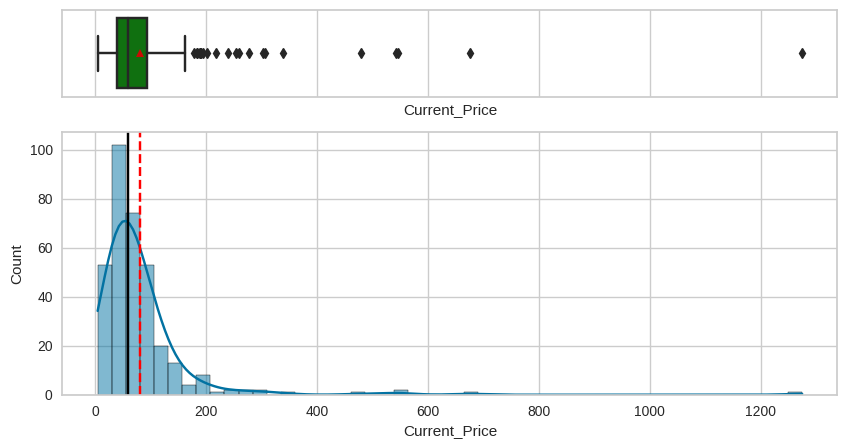

In [150]:
histogram_boxplot(df, num_cols[0], bins=50, kde=True, figsize=(10, 5))

current_price is skewed right & have many outliners

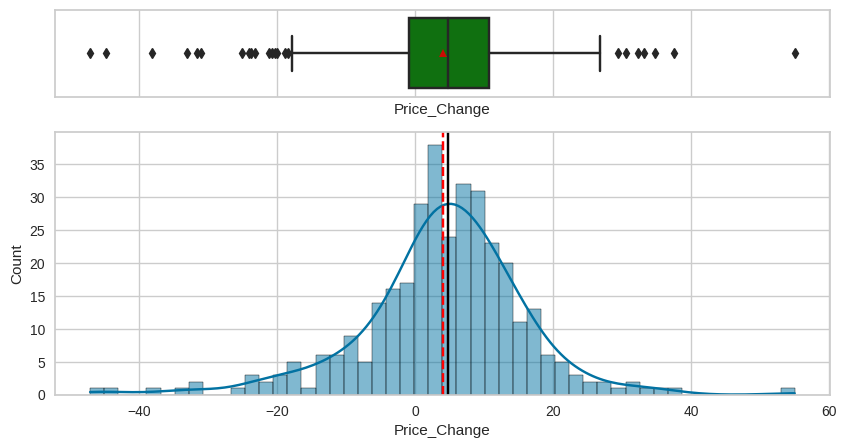

In [151]:
# lets see price change data

histogram_boxplot(df, num_cols[1], bins=50, kde=True, figsize=(10, 5))

* have both +ve & -ve outliners
* distribution seems alright


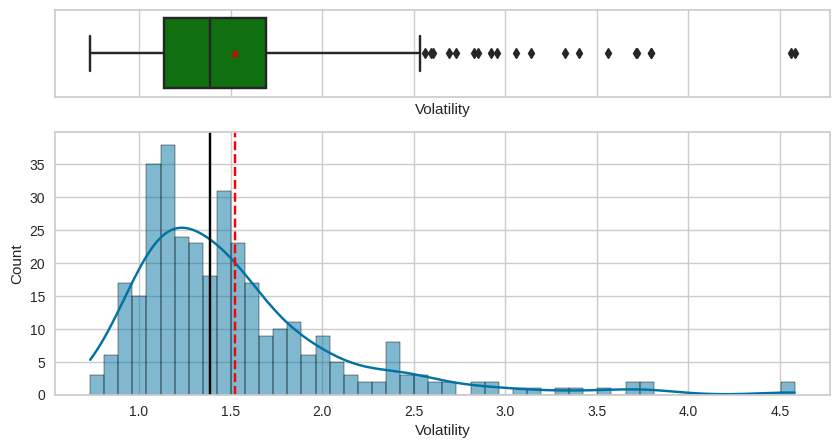

In [152]:
histogram_boxplot(df, num_cols[2], bins=50, kde=True, figsize=(10, 5))

* have +ve outliners
* data skewed right

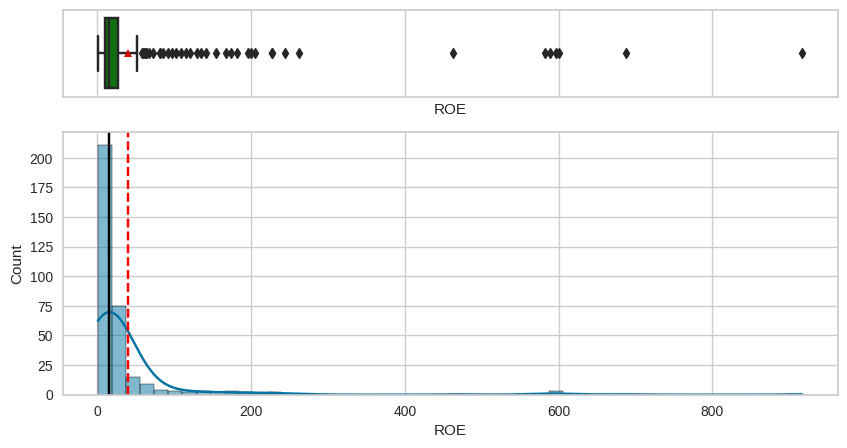

In [153]:
histogram_boxplot(df, num_cols[3], bins=50, kde=True, figsize=(10, 5))

* lot's of +ve outliners
* data skewed right

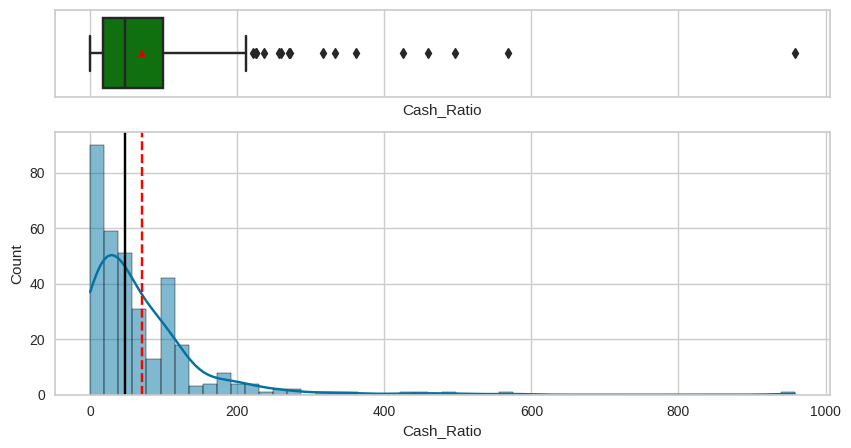

In [154]:
histogram_boxplot(df, num_cols[4], bins=50, kde=True, figsize=(10, 5))

* few +ve outliners
* skewed right

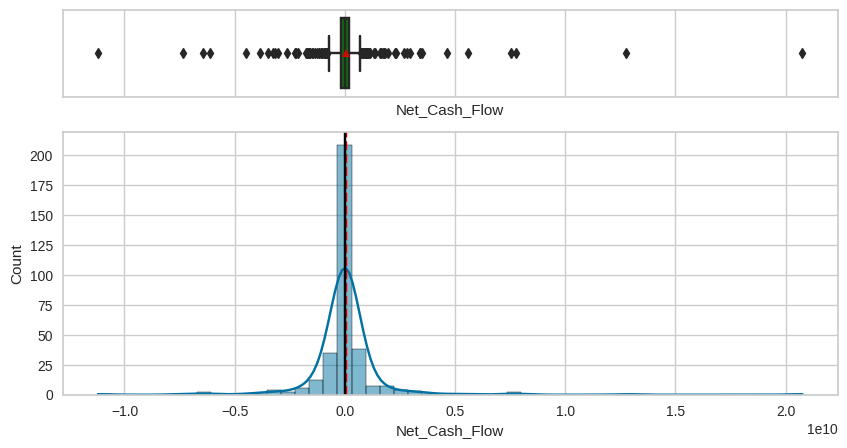

In [155]:
histogram_boxplot(df, num_cols[5], bins=50, kde=True, figsize=(10, 5))

* a lot of +ve & -ve outliners
* data seems quite normal

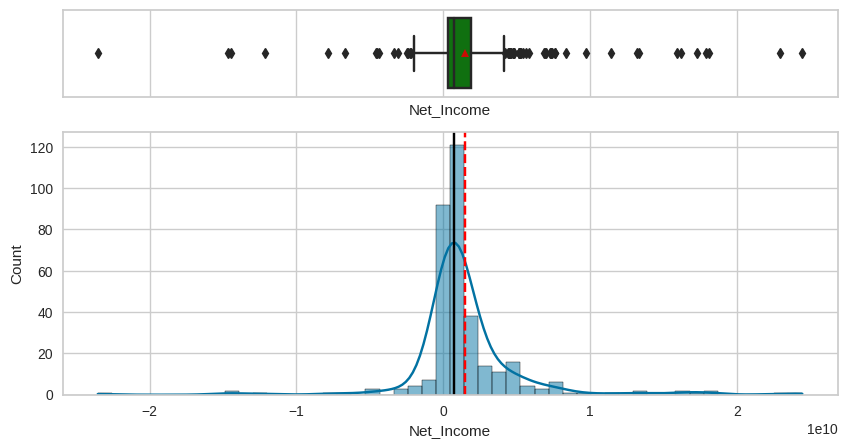

In [156]:
histogram_boxplot(df, num_cols[6], bins=50, kde=True, figsize=(10, 5))

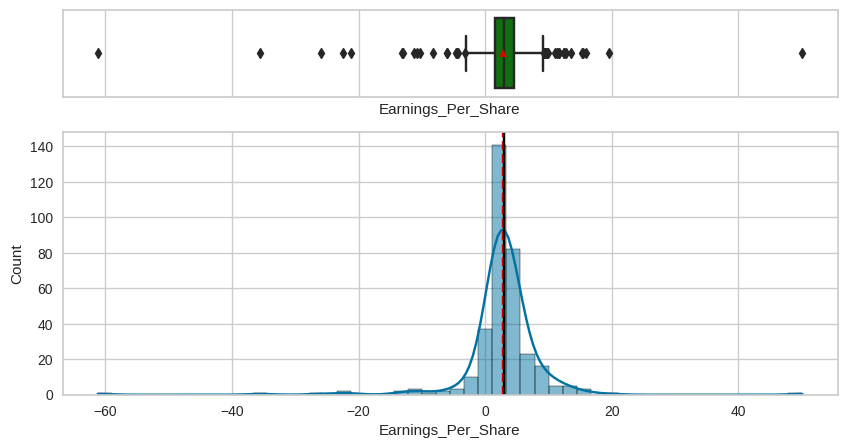

In [157]:
histogram_boxplot(df, num_cols[7], bins=50, kde=True, figsize=(10, 5))

* Net_Income & earning per share both have lot of ouliners bith +ve & -ve

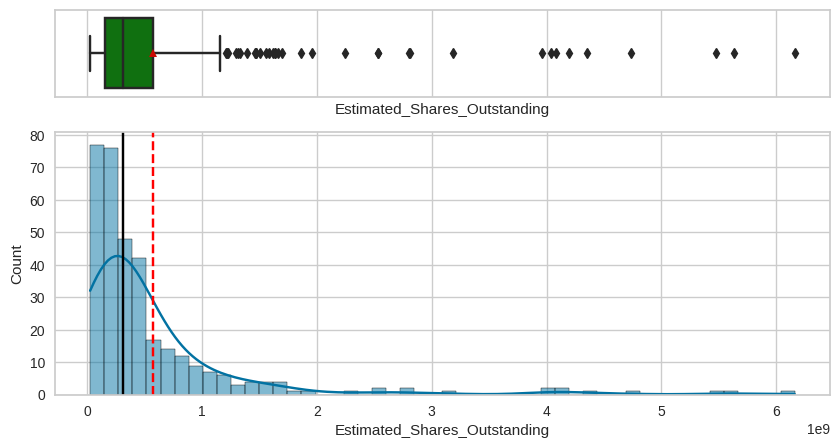

In [158]:
histogram_boxplot(df, num_cols[8], bins=50, kde=True, figsize=(10, 5))

* lots of +ve outliners
* feature skewed right

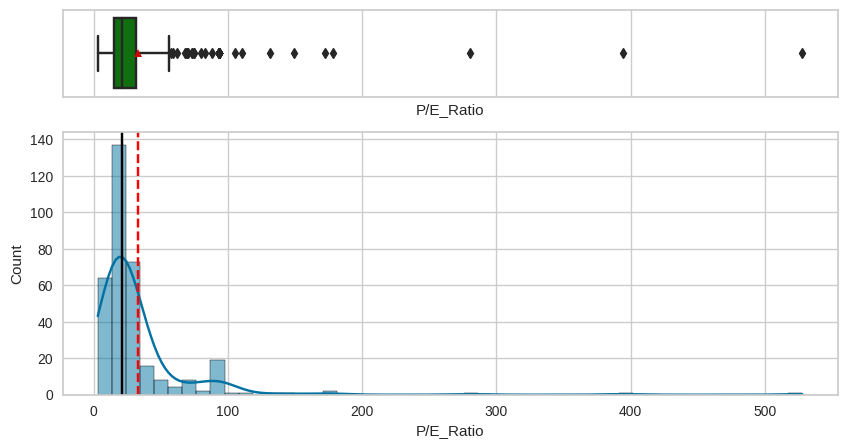

In [159]:
histogram_boxplot(df, num_cols[9], bins=50, kde=True, figsize=(10, 5))

* good number of +ve outliners
* feature skewed right

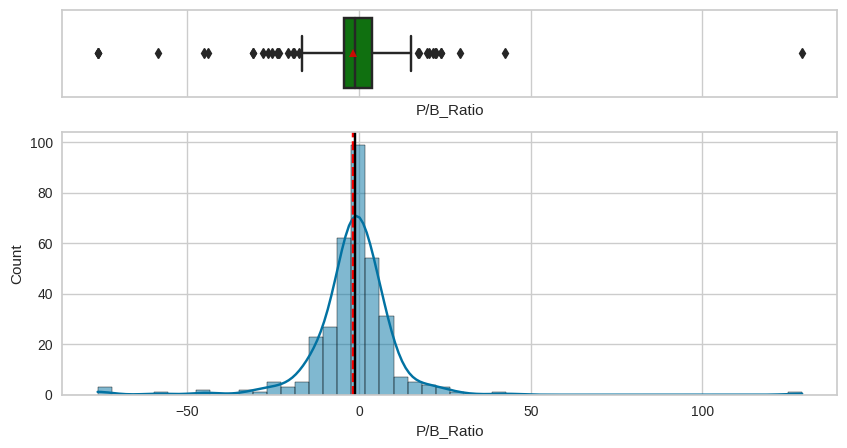

In [160]:
histogram_boxplot(df, num_cols[10], bins=50, kde=True, figsize=(10, 5))

* some +ve & -ve outliners

* In conclusion, above features are mostly skewed right with both +ve & -ve outliners

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [161]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

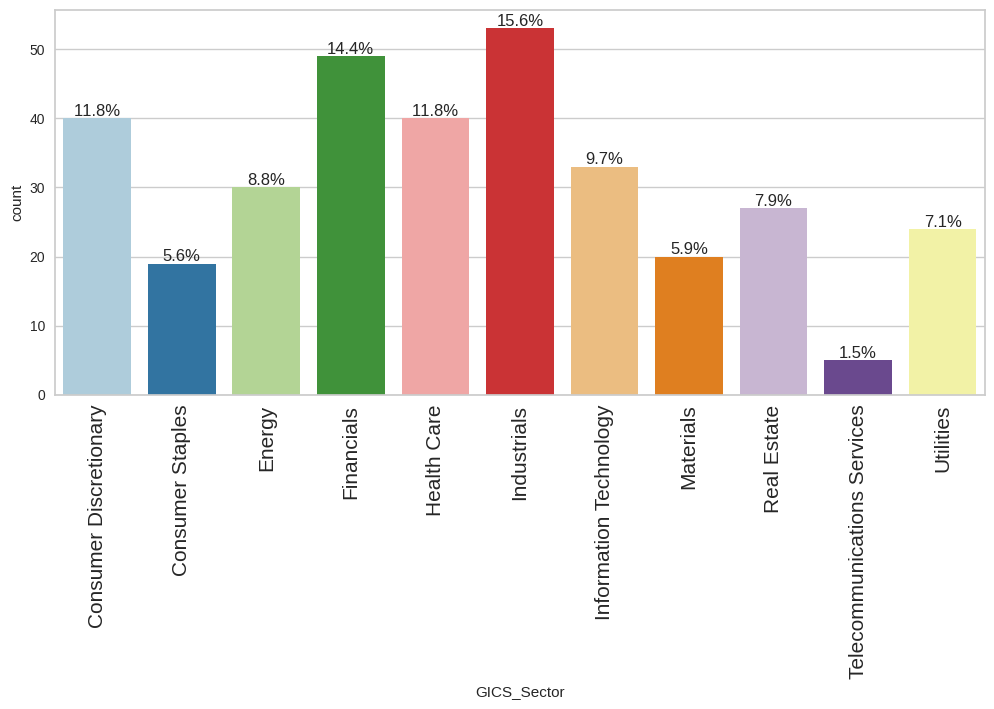

In [162]:
labeled_barplot(df, "GICS_Sector", perc=True)

* maximum securities are of INDUSTRIAL & minimin is of Telecommunication Services

In [163]:
pd.crosstab(df.GICS_Sub_Industry, df.GICS_Sector).style.highlight_max(
    color="green", axis=0
)

* mostly Oil & Gas Exploration & Production has thge highest security, under energy sector

<Axes: xlabel='GICS_Sector', ylabel='Price_Change'>

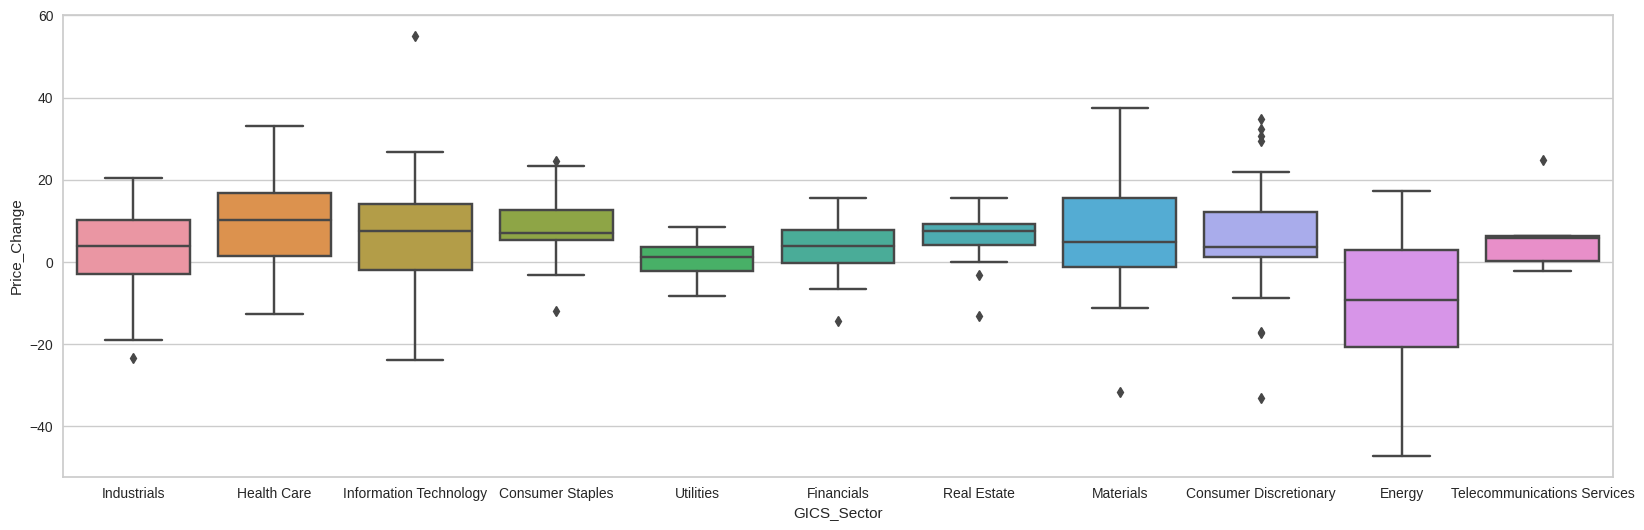

In [164]:
# lets do bivariate analysis with stock price & GICS sector

plt.figure(figsize=(20, 6))
sns.boxplot(data = df, x = "GICS_Sector", y = "Price_Change")

* energy sector has maximum variation with respect to price change & real estate has minimum variation WRT price change

*  Heathcare, Information technology & Materials have maximum number of securities  with higly positive price change

<Axes: xlabel='GICS_Sector', ylabel='Cash_Ratio'>

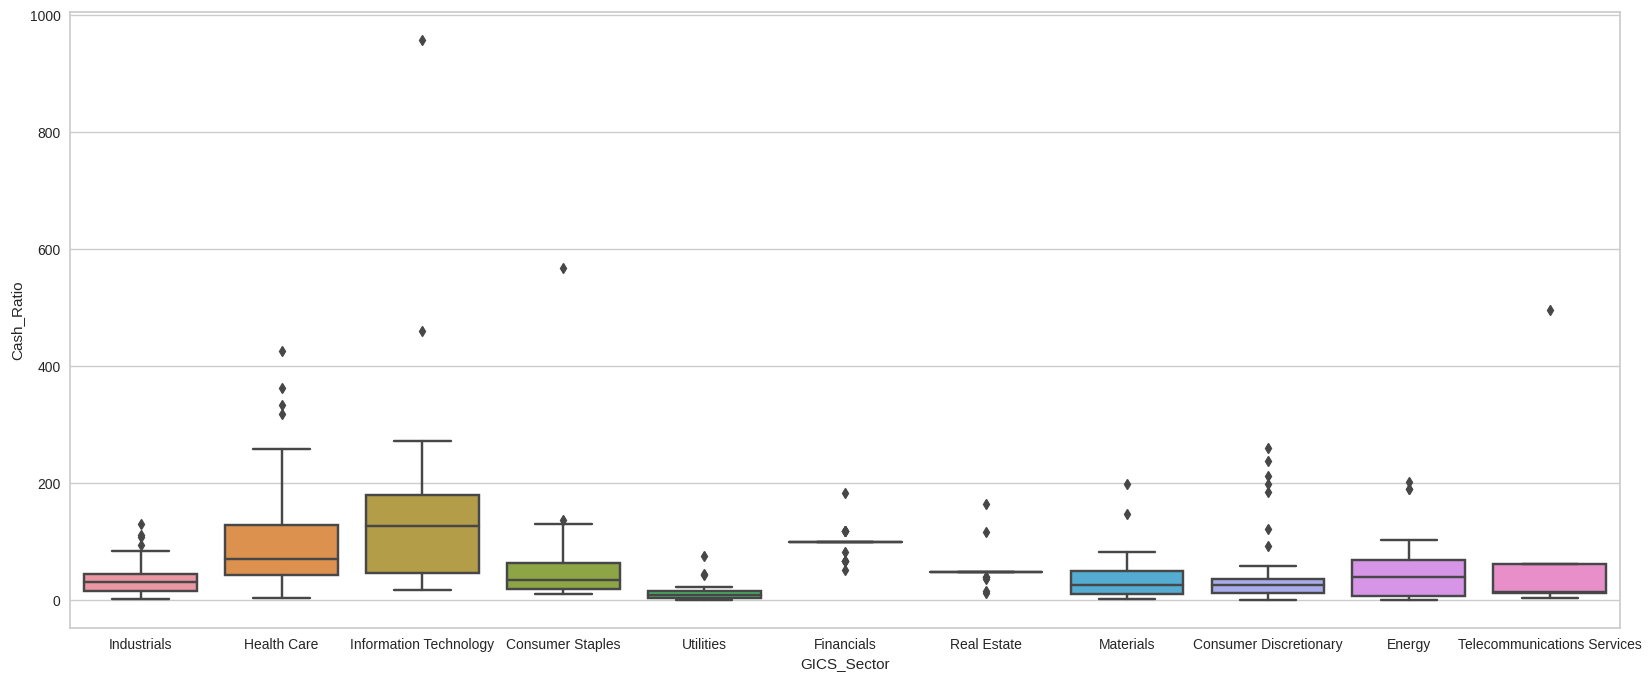

In [165]:
# cash ration vs GICS sector

plt.figure(figsize=(20, 8))
sns.boxplot(data = df, x = "GICS_Sector", y = "Cash_Ratio")

- maximum cash ratio variation is of Information Technology followed by Health care
- Minimum cash ratio variation if of Real state folowed by Financials
- also, Informational sector has highest positive outliner

<Axes: xlabel='GICS_Sector', ylabel='P/E_Ratio'>

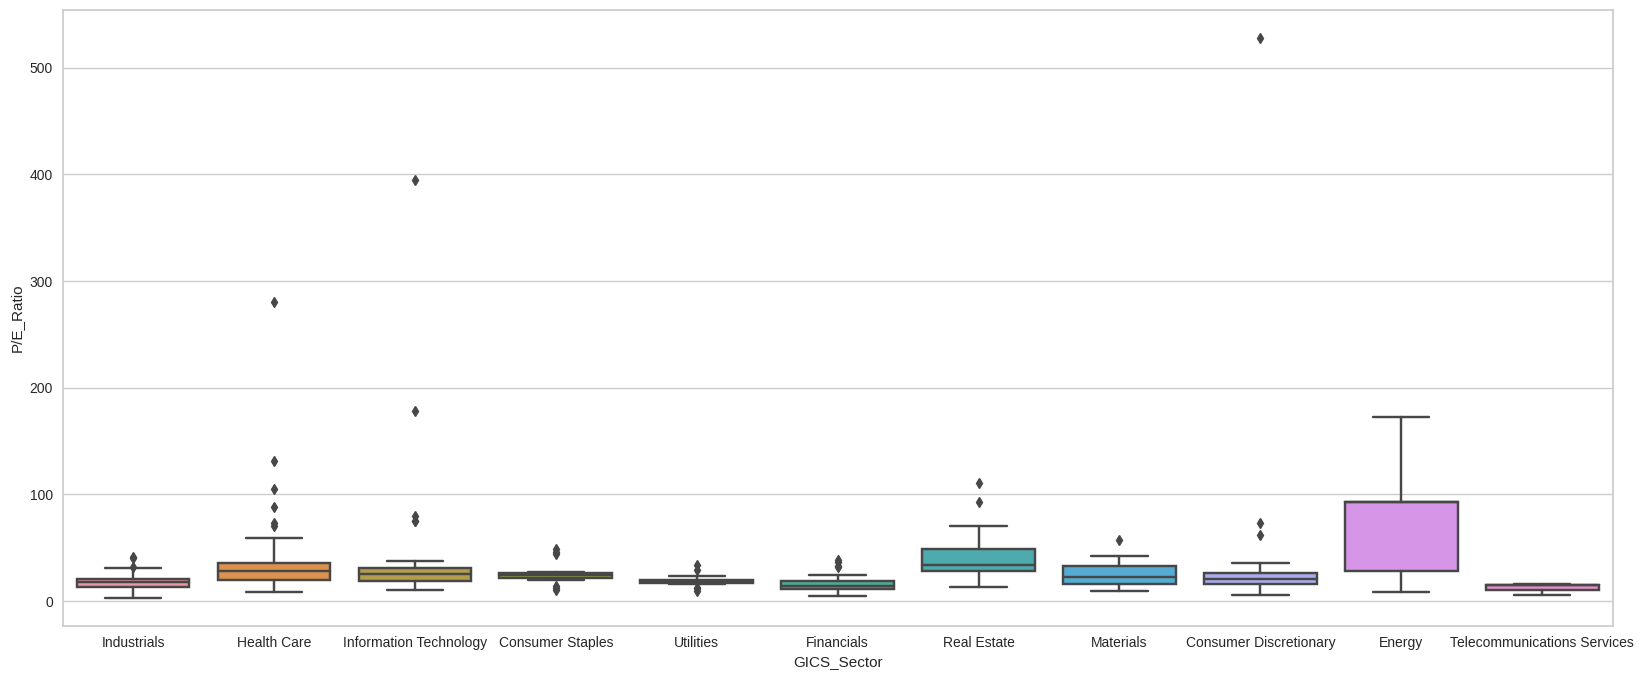

In [166]:
# P/R ratio vs GICS sector

plt.figure(figsize=(20, 8))
sns.boxplot(data = df, x = "GICS_Sector", y = "P/E_Ratio")

- Energy sector has highest variance in P/E ratio, indicating investor is more interested in investing in single share single share of company

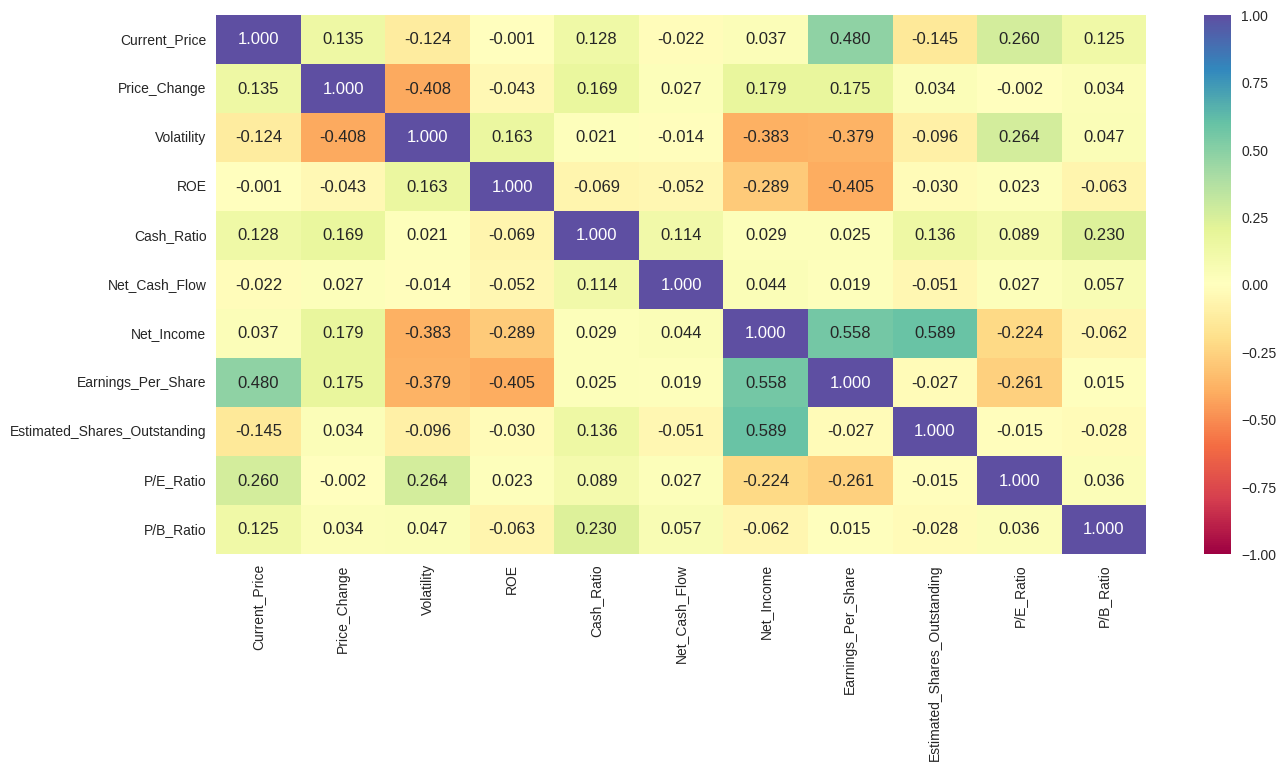

In [167]:
# let's check co relation between features

plt.figure(figsize = (15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral"
)
plt.show()

- earning per share is highly related with net_income
- ROE is negatively related with earning_per_share & net_income.
- Volatility is negatively related with earning_per_share, net_income & price change

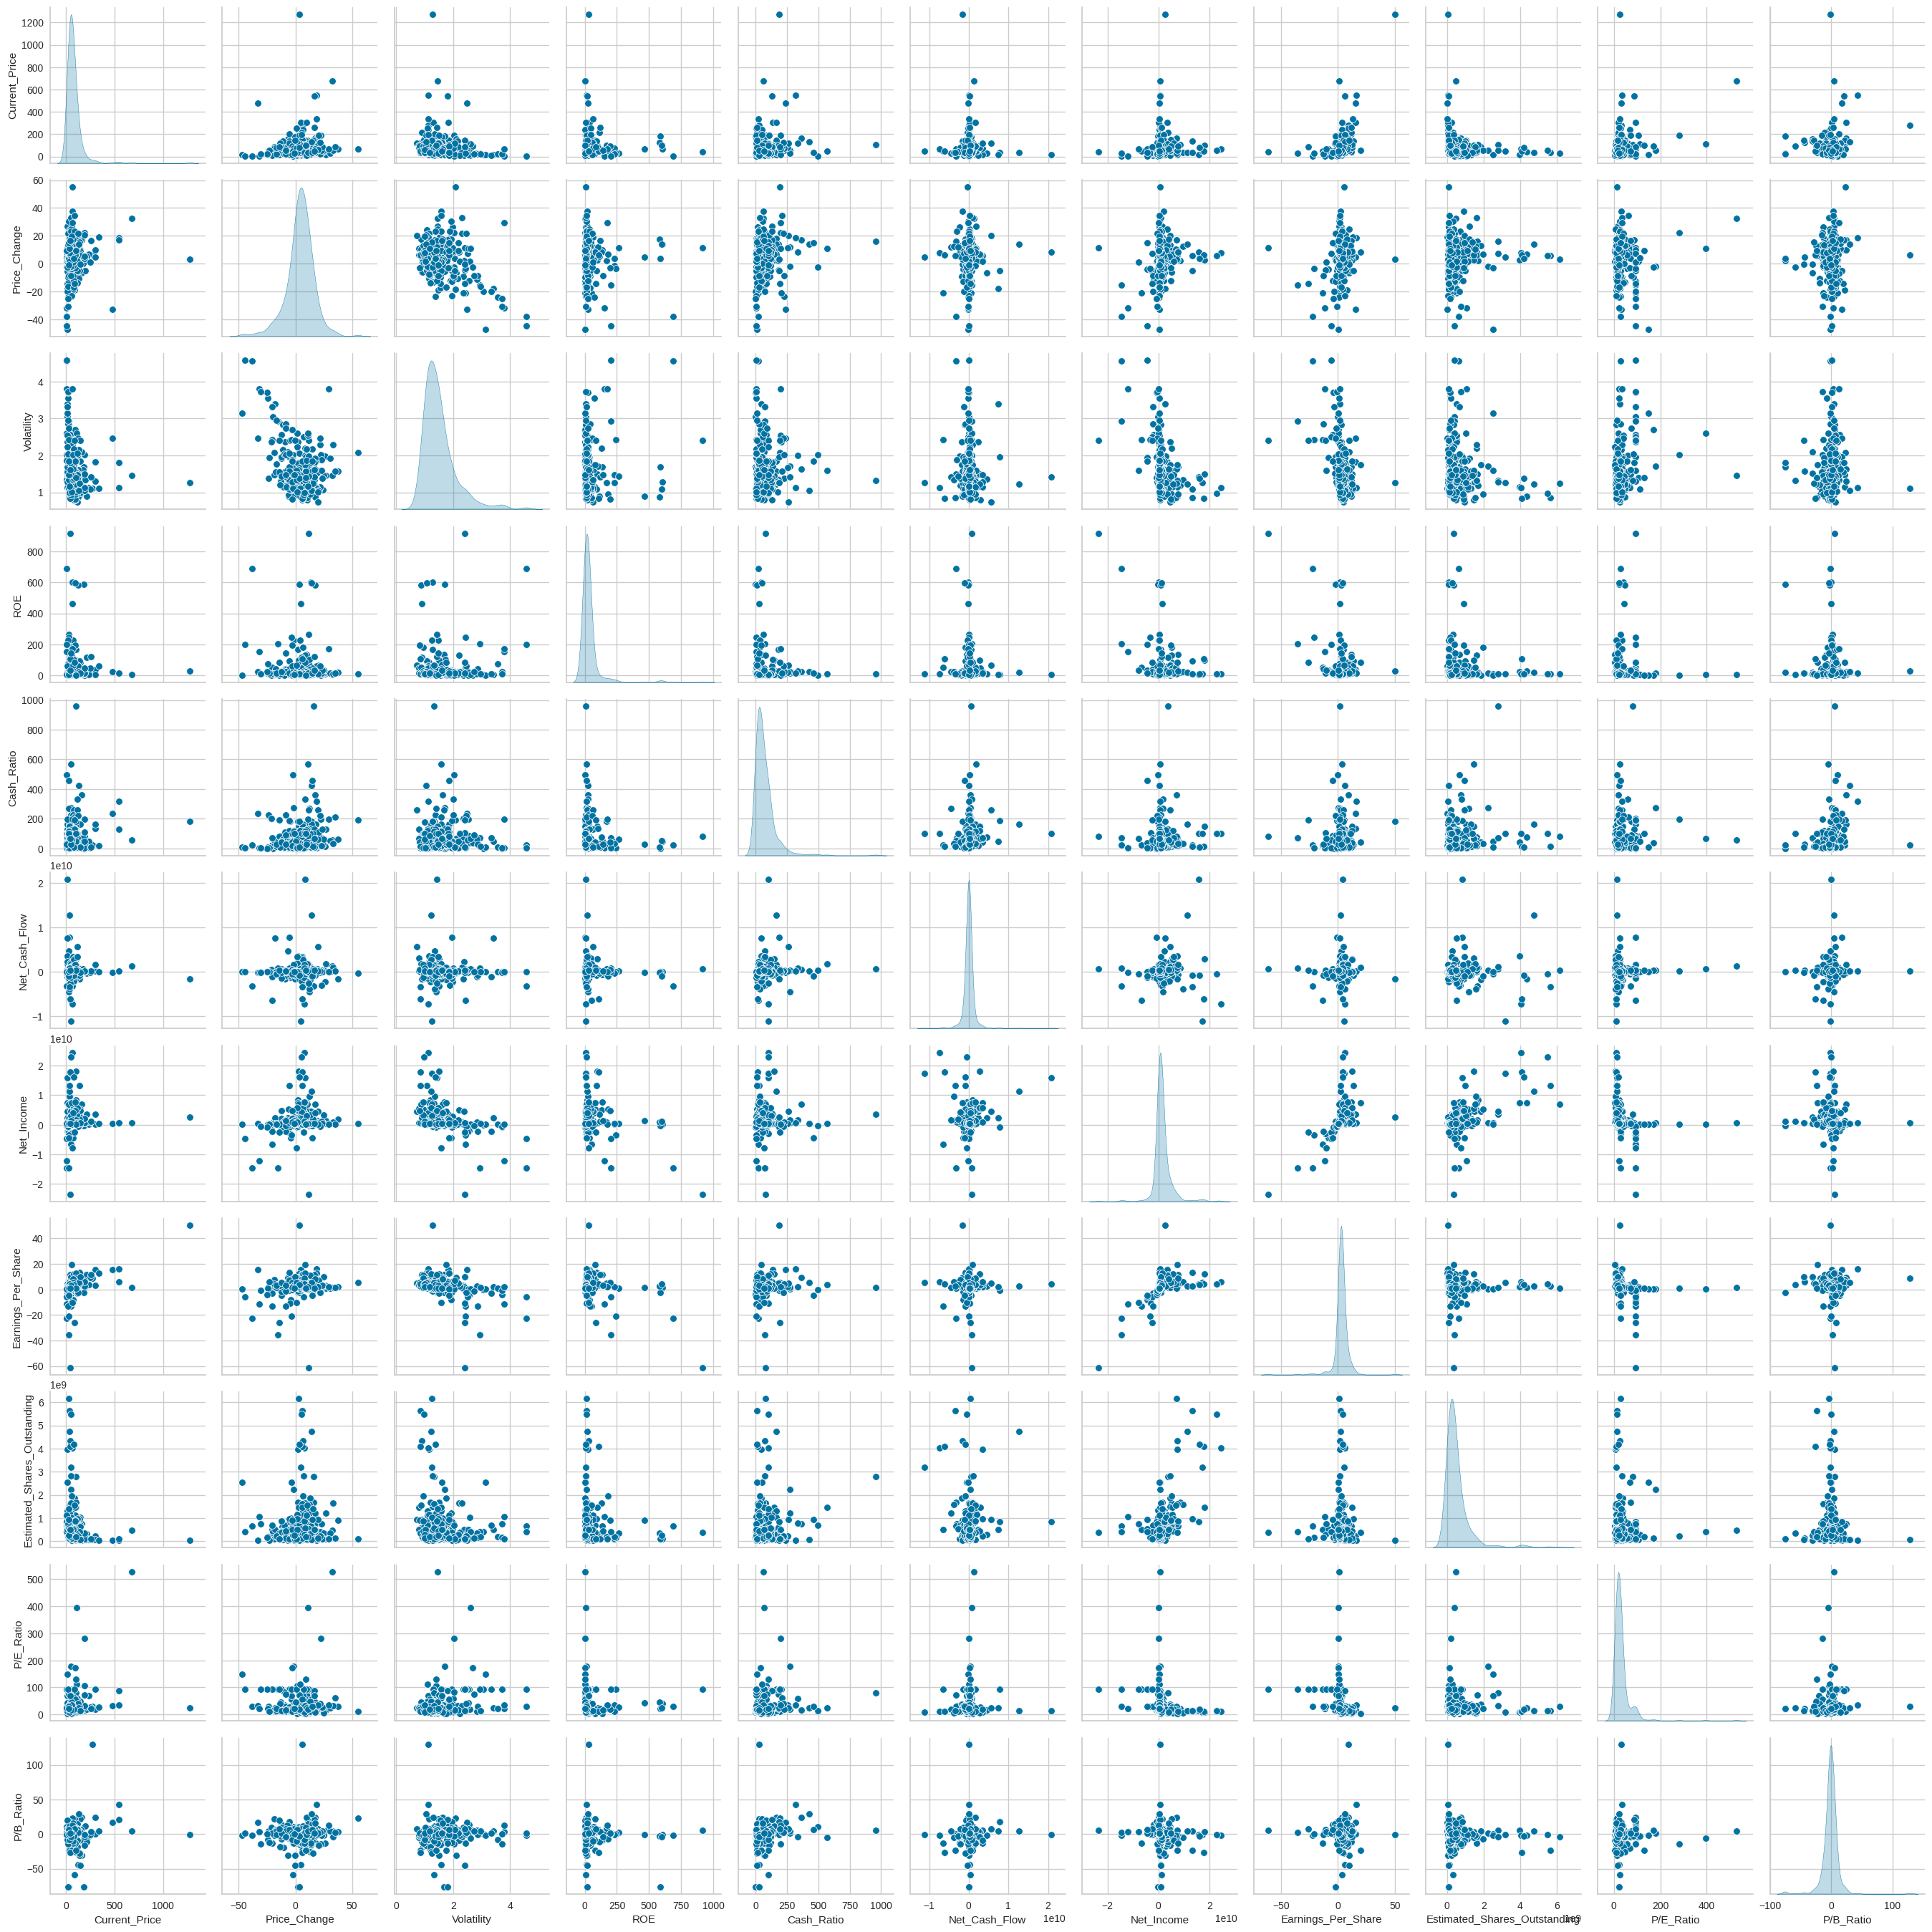

In [168]:
# pair plot analysis

sns.pairplot(df[num_cols], diag_kind="kde")

* Volatility is trimodal
- P/E ration is bimodal
- rest all features seems normal

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [169]:
sc = StandardScaler()

subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis = 1)),
    columns = df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis = 1).columns
)

subset_scaled_df.head(10)

Current_Price  Price_Change  Volatility   ROE  Cash_Ratio  Net_Cash_Flow  \
0          -0.39          0.49        0.27  0.99       -0.21          -0.34   
1          -0.22          0.36        1.14  0.94        0.08          -0.00   
2          -0.37          0.60       -0.43 -0.19       -0.03           0.45   
3           0.13          0.83       -0.28 -0.32        1.22          -0.15   
4          -0.26         -0.49        0.30 -0.27        2.24           0.13   
5          -0.45         -1.34       -0.02 -0.31       -0.23          -0.13   
6           2.00          0.18       -0.69 -0.10       -0.50           0.02   
7          -0.38         -0.16       -0.68 -0.32       -0.62           0.12   
8          -0.23         -0.14       -0.77 -0.30       -0.68          -0.02   
9          -0.21         -0.09       -0.81 -0.27        0.32          -0.19   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0        1.55                1.31                          0.11      -0.65   
1        0.93                0.06                          1.25      -0.31   
2        0.74                0.02                          1.10      -0.39   
3       -0.22               -0.23                         -0.09       0.95   
4       -0.20               -0.37                          1.98       3.29   
5        0.09                0.03                          0.05      -0.46   
6       -0.23                0.93                         -0.60      -0.04   
7       -0.22               -0.03                         -0.39      -0.36   
8        0.14                0.05                         -0.18      -0.32   
9        0.26                0.47                         -0.17      -0.51   

   P/B_Ratio  
0      -0.51  
1      -0.50  
2       0.09  
3       0.42  
4       0.20  
5       0.66  
6       9.38  
7       0.07  
8      -0.09  
9      -0.01

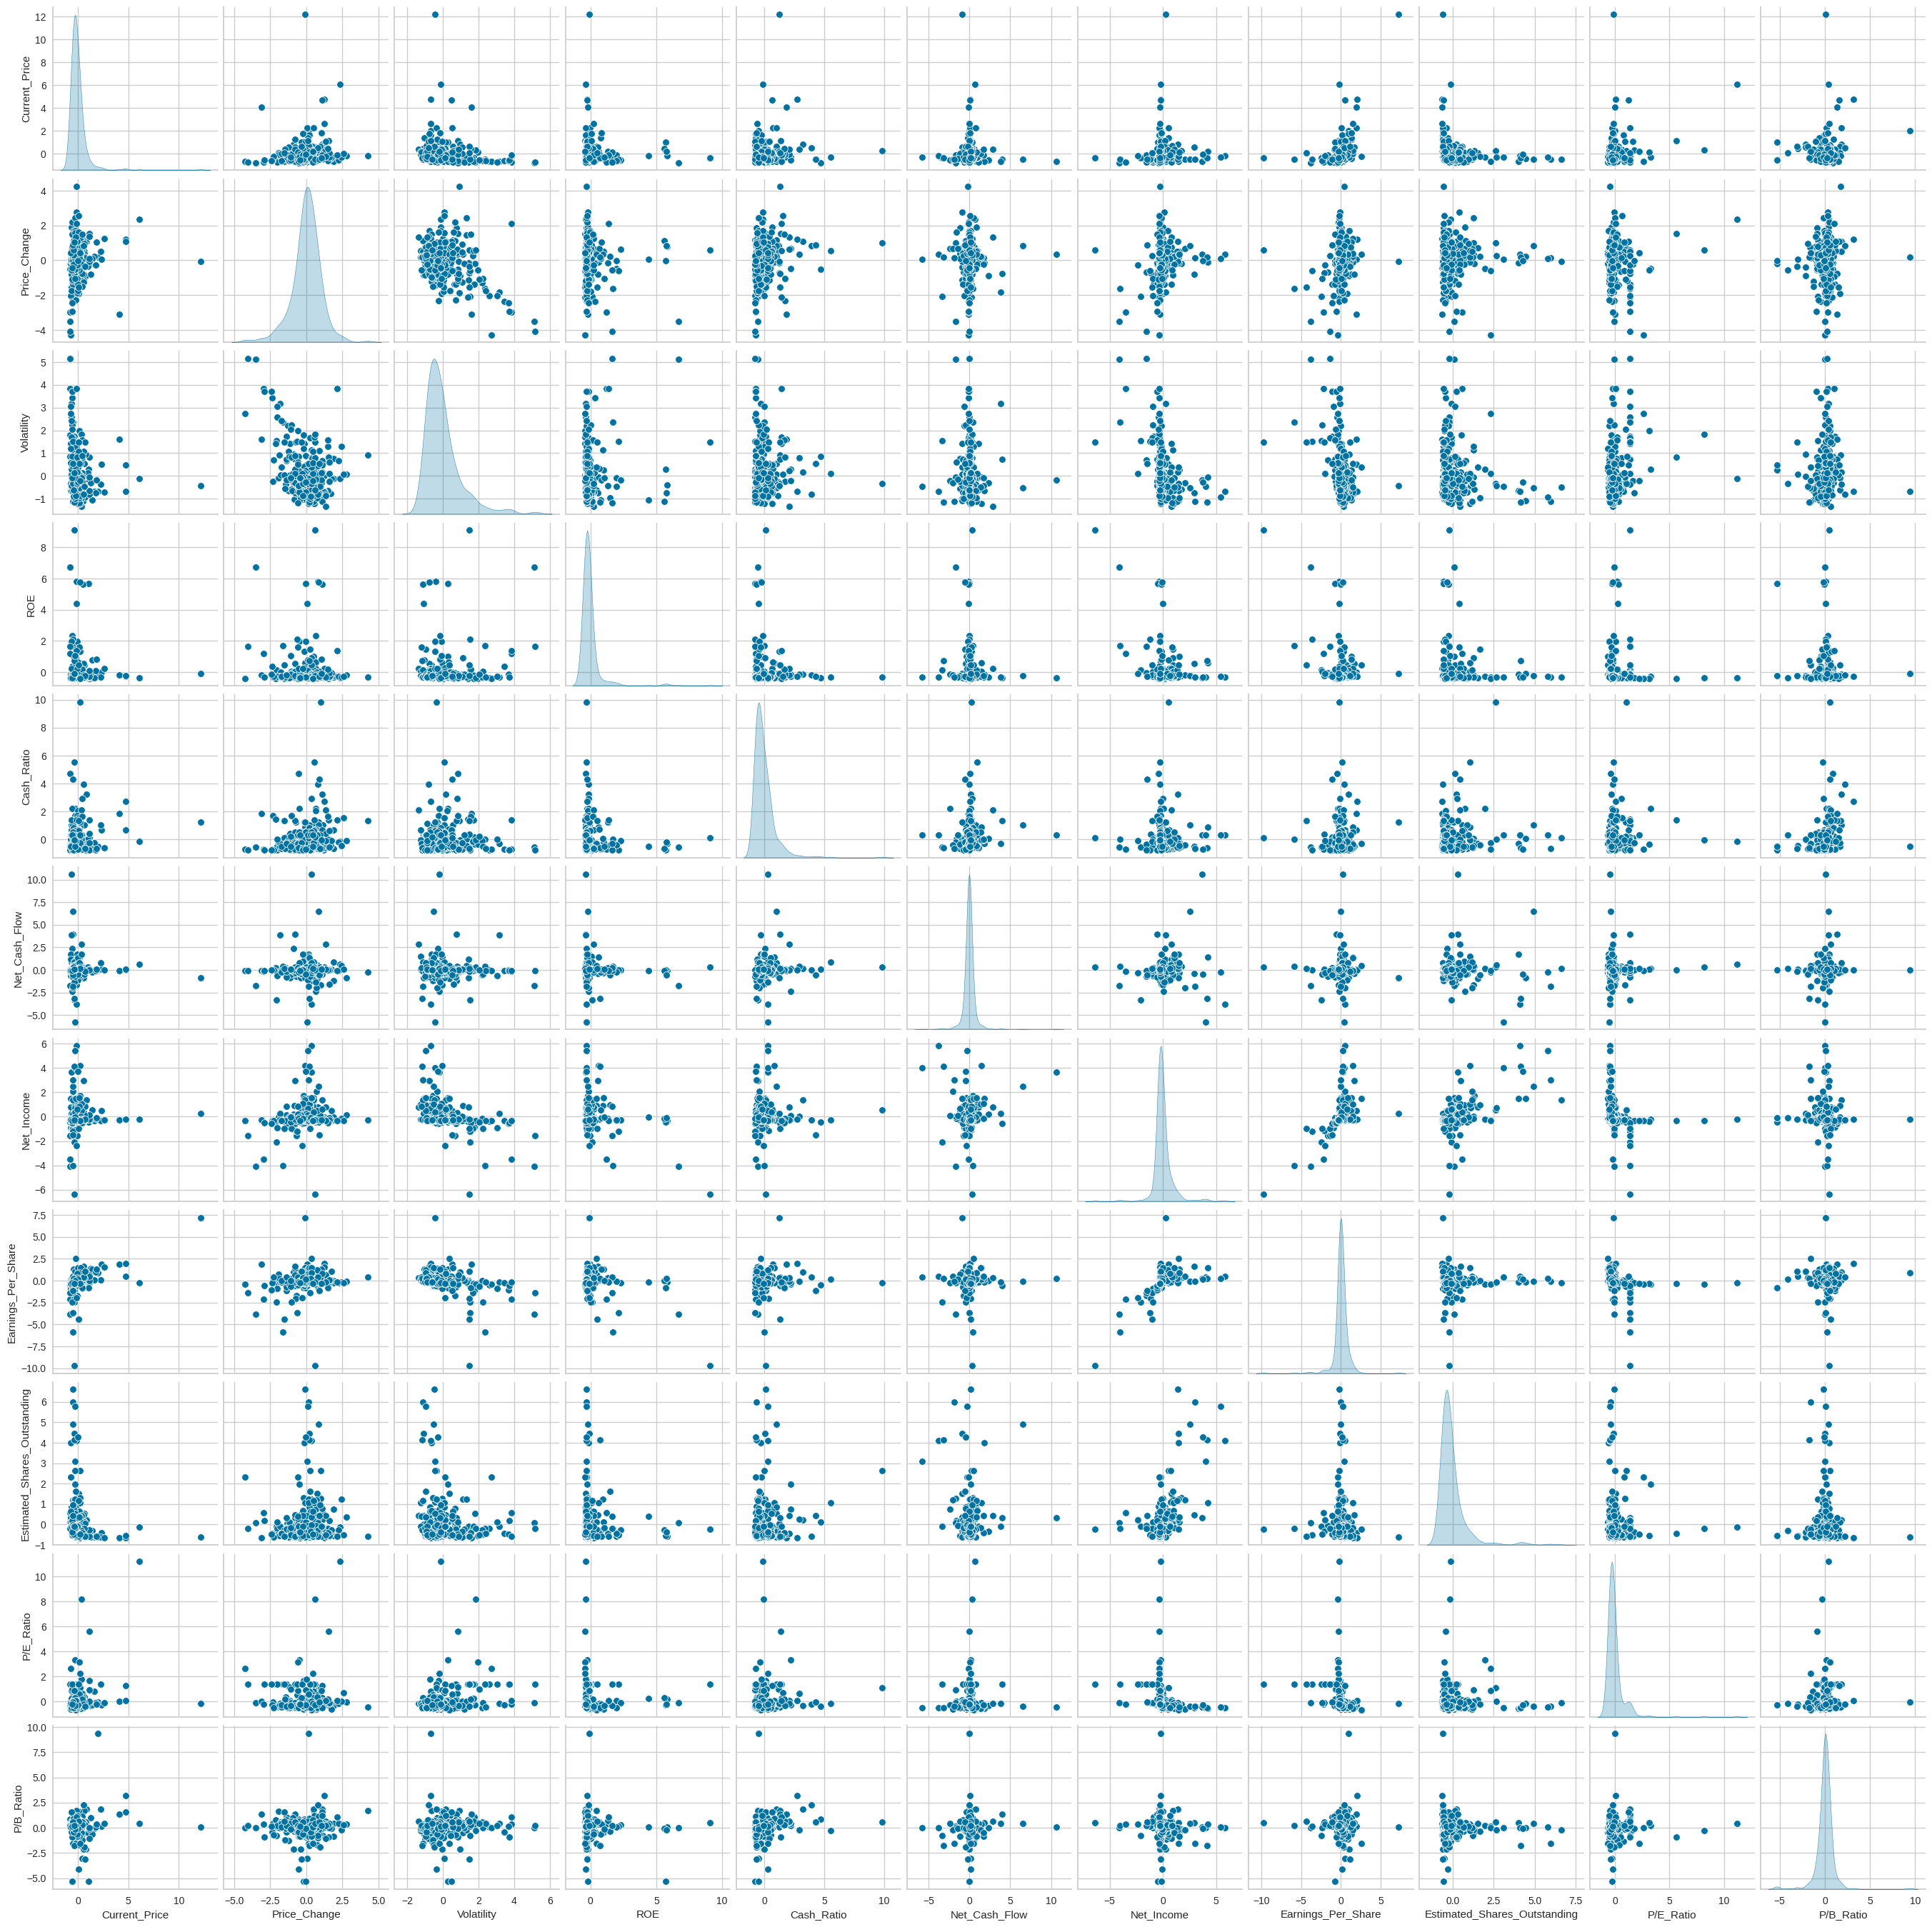

In [170]:
sns.pairplot(subset_scaled_df, diag_kind="kde")

* After scaler transformation, feature are on same scale now
* Also, till now, we camn say that their are no missing values but we have few outliners which are are considering as a real data points

## K-means Clustering

For  1  clusters Average distortion is =  864.4523772535376
For  2  clusters Average distortion is =  809.9882896241185
For  3  clusters Average distortion is =  771.5404832832853
For  4  clusters Average distortion is =  741.7057662213233
For  5  clusters Average distortion is =  724.8392647603538
For  6  clusters Average distortion is =  703.7949852308382
For  7  clusters Average distortion is =  688.2756503519701
For  8  clusters Average distortion is =  668.871556519307


Text(0, 0.5, 'Average Distortion')

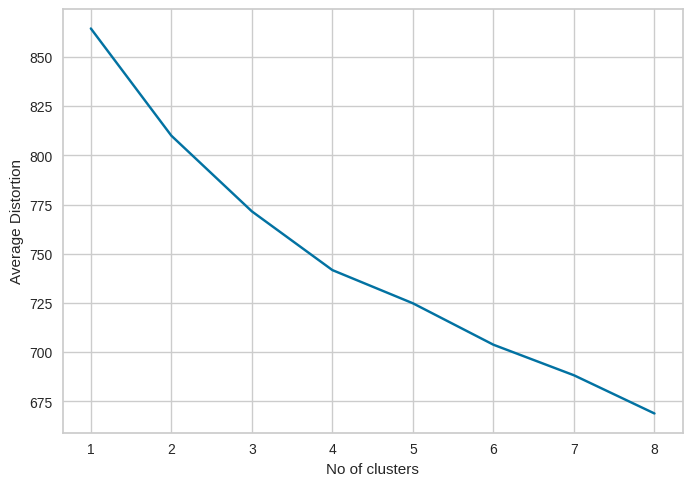

In [171]:
from typing import no_type_check
# from clustering lets us loop from 1 to 8 to find out best number of clusters

clusters = range(1, 9)

mean_Distortion = []

for k in clusters:
  model = KMeans(n_clusters = k)
  model.fit(subset_scaled_df)
  prediction = model.predict(subset_scaled_df)
  distortion = sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis = 1))
  mean_Distortion.append(distortion)

  print('For ', k, ' clusters Average distortion is = ', distortion)

plt.plot(clusters, mean_Distortion, 'bx-')
plt.xlabel('No of clusters')
plt.ylabel('Average Distortion')


* looks like we have 4 to 5 clusters as per plot

In [172]:
# lets check silhoutte score

sil_score = []

cluster_list = list(range(2, 10))
for n in cluster_list:
  cluster = KMeans(n_clusters = n)
  preds = cluster.fit_predict(subset_scaled_df)
  score = silhouette_score(subset_scaled_df, preds)
  sil_score.append(score)
  print('For ', n, ' clusters Silhoutte score is = ', score)



For  2  clusters Silhoutte score is =  0.4484662124740991
For  3  clusters Silhoutte score is =  0.4576529285895266
For  4  clusters Silhoutte score is =  0.45483520750820555
For  5  clusters Silhoutte score is =  0.38187327375998065
For  6  clusters Silhoutte score is =  0.41660279003697054
For  7  clusters Silhoutte score is =  0.4178128319332058
For  8  clusters Silhoutte score is =  0.39376390398144023
For  9  clusters Silhoutte score is =  0.41020357310197136


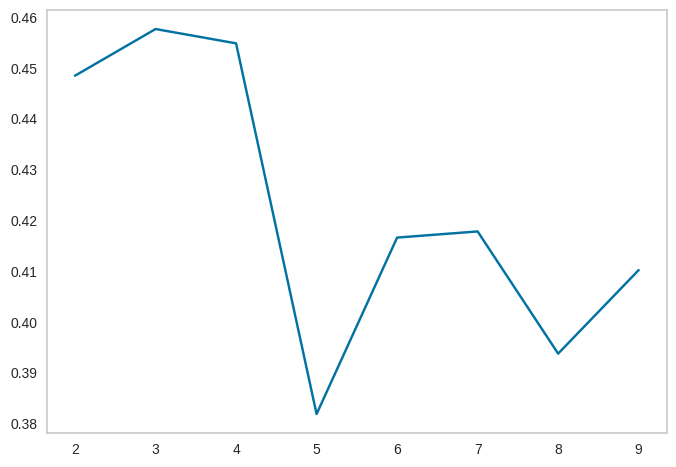

In [173]:
plt.plot(cluster_list, sil_score)
plt.grid()

* from above plot, 4 clusters seems to be a good selection

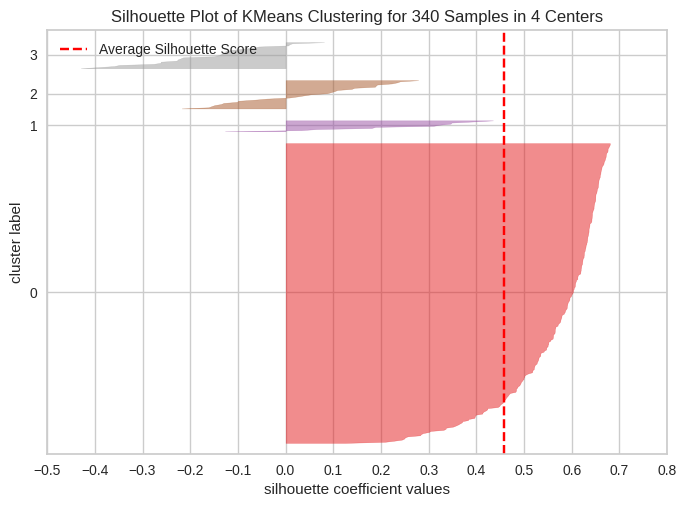

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [174]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

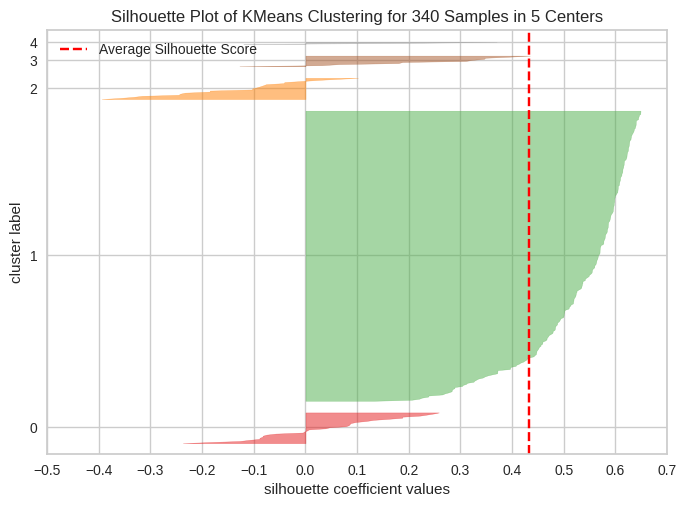

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [175]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

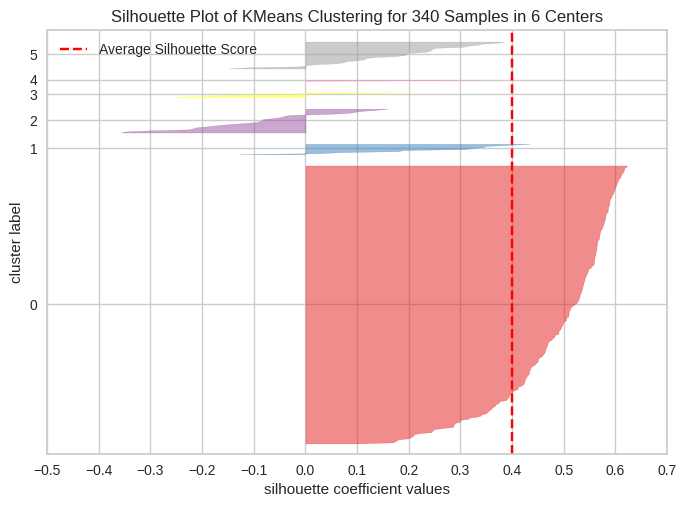

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [176]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Finalyzing k = 4

In [177]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [178]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [179]:
cluster_profile = df.groupby('K_means_segments').mean()
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values
cluster_profile

Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  \
K_means_segments                                                               
0                        234.17         13.40        1.73  25.60      277.64   
1                         38.10        -15.37        2.91 107.07       50.04   
2                         50.52          5.75        1.13  31.09       75.91   
3                         72.40          5.07        1.39  34.62       53.00   

                  Net_Cash_Flow     Net_Income  Earnings_Per_Share  \
K_means_segments                                                     
0                 1554926560.00  1572611680.00                6.05   
1                 -159428481.48 -3887457740.74               -9.47   
2                -1072272727.27 14833090909.09                4.15   
3                  -14046223.83  1482212389.89                3.62   

                  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
K_means_segments                                                       
0                                 578316318.95      74.96      14.40   
1                                 480398572.85      90.62       1.34   
2                                4298826628.73      14.80      -4.55   
3                                 438533835.67      23.84      -3.36   

                  count_in_each_segments  
K_means_segments                          
0                                     25  
1                                     27  
2                                     11  
3                                    277

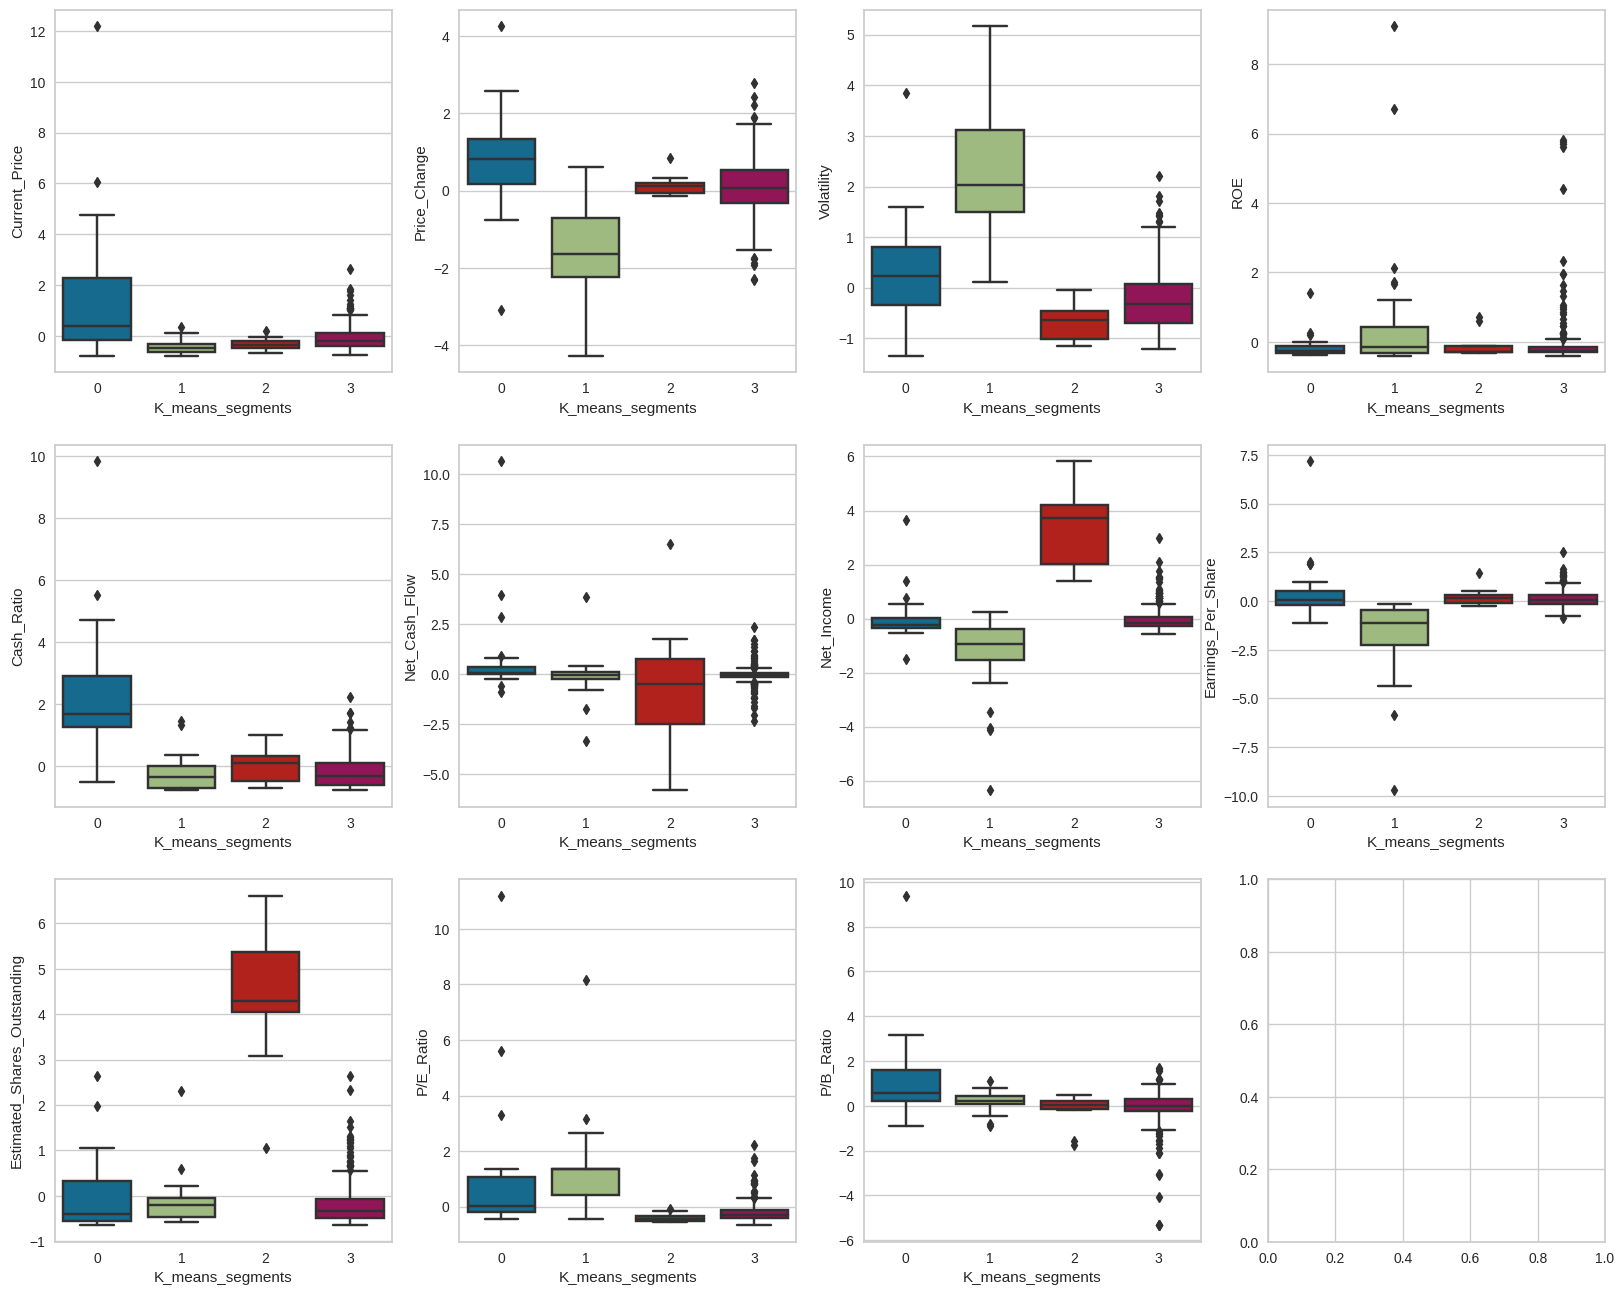

In [180]:
fig, axes = plt.subplots(3, 4, figsize = (20, 16))
counter = 0
for i in range(3):
  for j in range(4):
    if counter < 11:
      sns.boxplot(ax = axes[i, j], y= subset_scaled_df[num_cols[counter]], x = subset_scaled_df['K_means_segments'])
    counter = counter + 1


* For Cluster 0
  * In this we have 25 different clusters
  * cash ratio = 277.64

* for cluster 1:
  * has 27 different securities
  - has a lowest cash ratio of 50

* cluster 2:
  *  has only 11 security
  * mostly similar to cluster 3

* cluster 3:
  *  majority security of 277
  * has security b/w 0 & 1 cluster

In [181]:
# lets compare clusters

pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color = 'green', axis = 0)

* as per cluster comparision, each clsuters has a strong point & cluster 1 & 3 are highly dominated by Energy & Industrial sector

## Hierarchical Clustering

In [182]:
from scipy.cluster.hierarchy import cophenet

distance_matrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]

high_co_corr = 0
high_dm_lm = [0, 0]

for d in distance_matrics:
  for l in linkage_methods:
    Z = linkage(subset_scaled_df, metric = d, method = l)
    c, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic corelation for ", d, " distance & linkage ", l , " is ", c)

    if high_co_corr  < c:
      high_co_corr = c
      high_dm_lm[0] = d
      high_dm_lm[1] = l



Cophenetic corelation for  euclidean  distance & linkage  single  is  0.9304469769832865
Cophenetic corelation for  euclidean  distance & linkage  complete  is  0.8559480642212798
Cophenetic corelation for  euclidean  distance & linkage  average  is  0.946403836884538
Cophenetic corelation for  euclidean  distance & linkage  weighted  is  0.7508819056084053
Cophenetic corelation for  chebyshev  distance & linkage  single  is  0.9161627445317929
Cophenetic corelation for  chebyshev  distance & linkage  complete  is  0.822502094153258
Cophenetic corelation for  chebyshev  distance & linkage  average  is  0.9379218754329659
Cophenetic corelation for  chebyshev  distance & linkage  weighted  is  0.9153206618543516
Cophenetic corelation for  mahalanobis  distance & linkage  single  is  0.9348505176633238
Cophenetic corelation for  mahalanobis  distance & linkage  complete  is  0.6881861661402056
Cophenetic corelation for  mahalanobis  distance & linkage  average  is  0.9360657692078034
Coph

* **Highest** Cophenetic corelation for  euclidean  distance & linkage  average  is  0.946403836884538

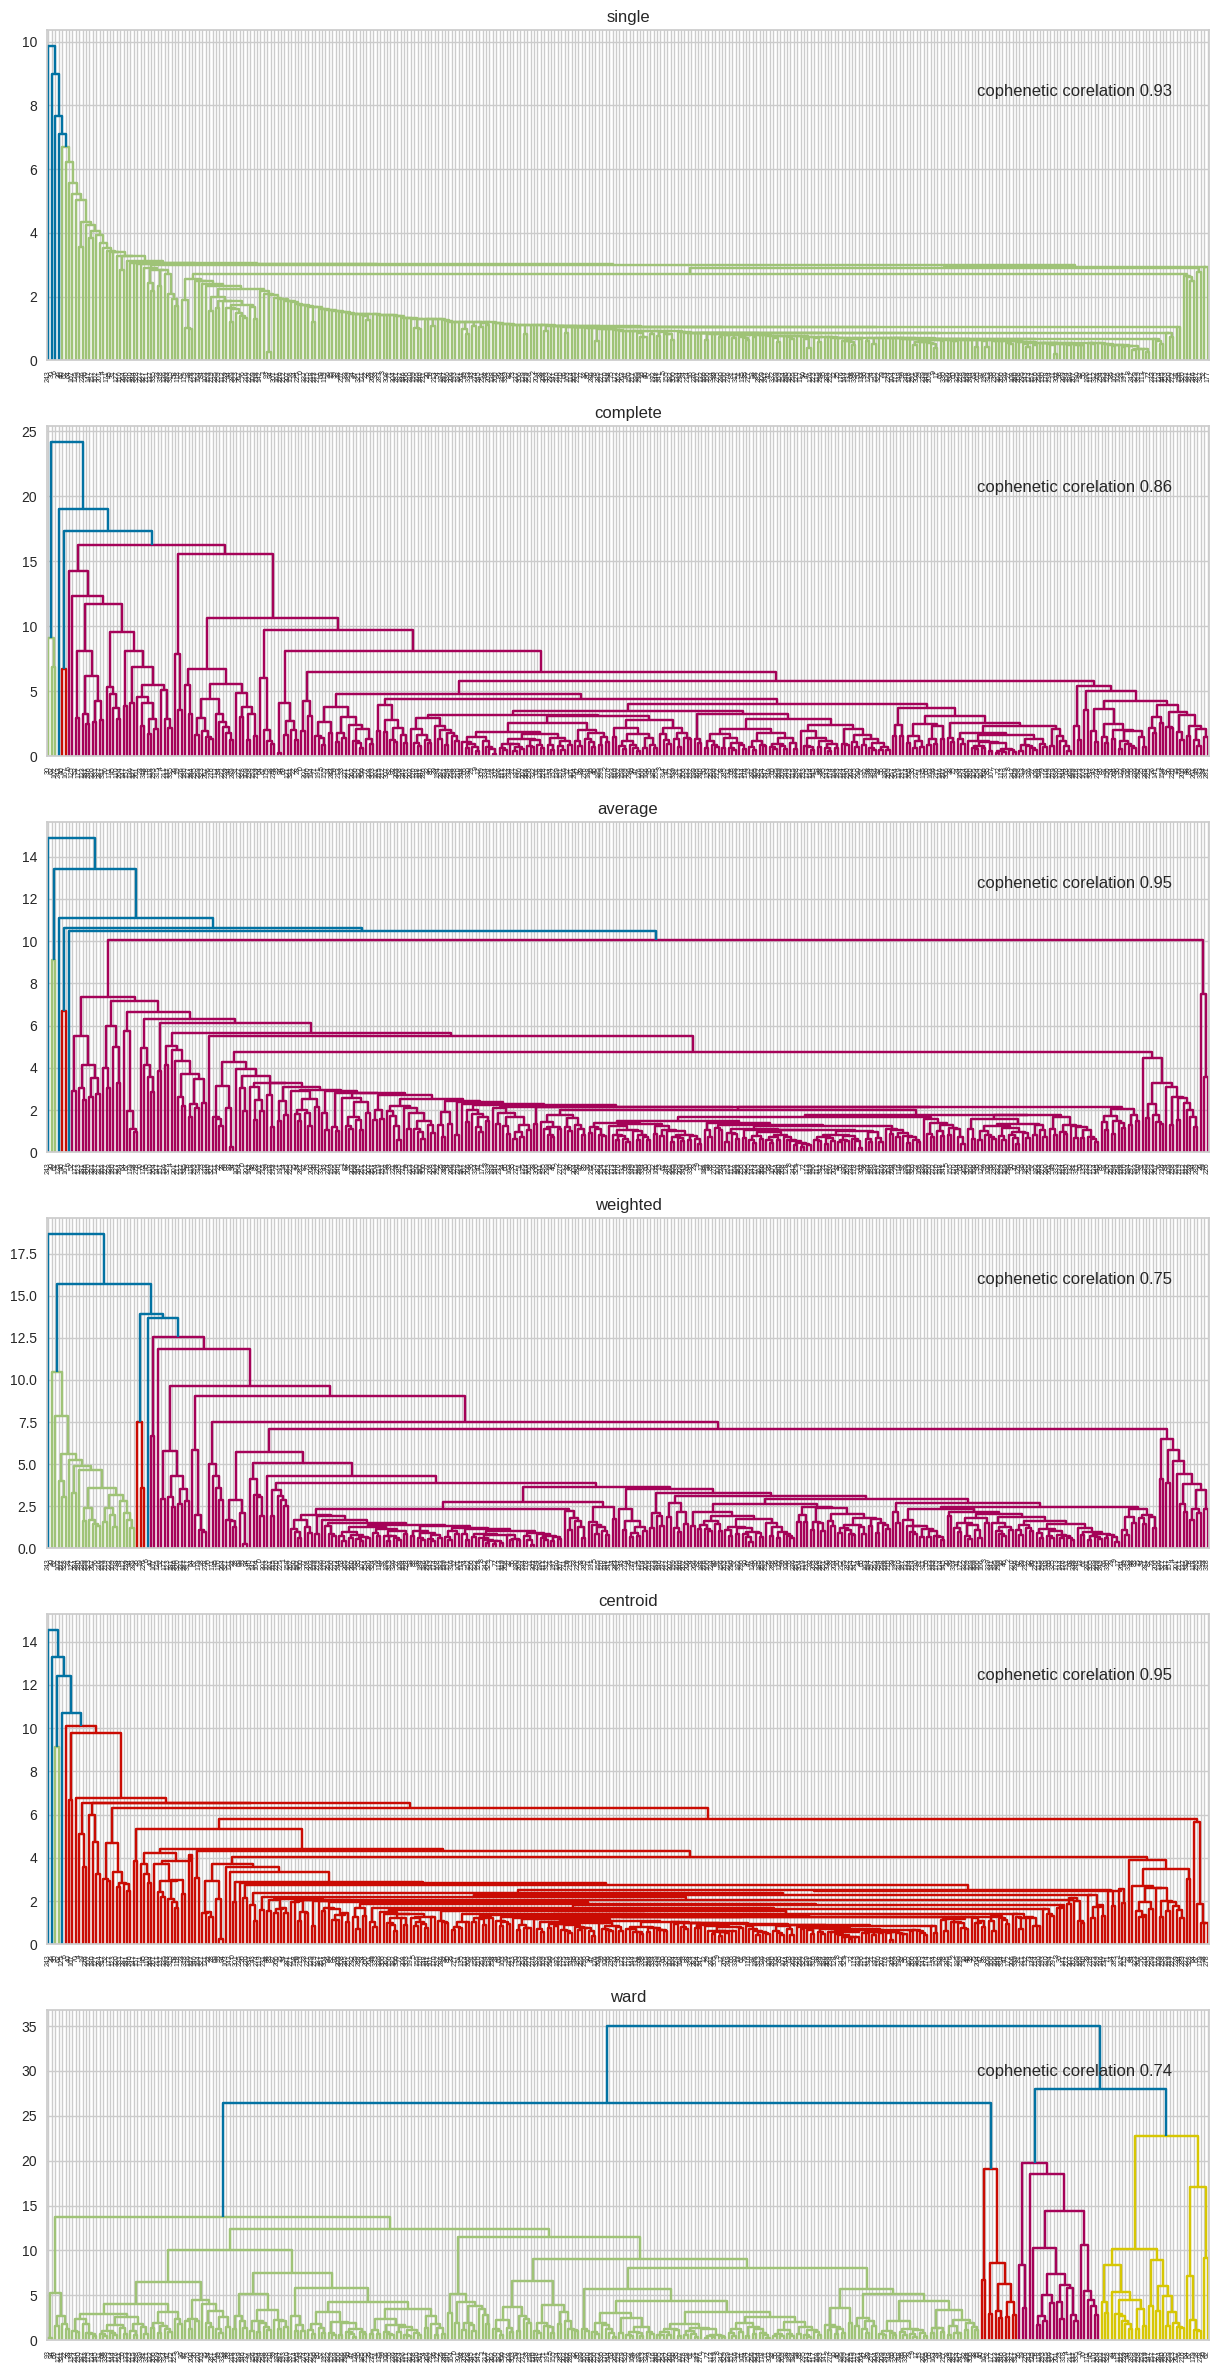

In [183]:
comapre_cols = ["Linkage", "Cophenetic Coefficient"]
linkage_methods = ["single", "complete", "average", "weighted", "centroid", "ward"]

fig, ax = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))


for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric = "euclidean", method = method)
    dendrogram(Z, ax = ax[i])
    ax[i].set_title(method)

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    ax[i].annotate(f"cophenetic corelation {coph_corr:0.2f}", (0.80, 0.80), xycoords="axes fraction")



* cophenetic corelaltion is highest with average, centroid, & euclidian
* also, as per dendogram, 6 appers to be right number of clusters

In [184]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [185]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [186]:
clusters_profile = df.groupby("HC_Clusters").mean()

In [187]:
clusters_profile["count_in_each_segments"] = (df.groupby("HC_Clusters")["Security"].count().values)
clusters_profile

Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  \
HC_Clusters                                                               
0                    77.29          4.10        1.52  35.34       66.90   
1                    25.64         11.24        1.32  12.50      130.50   
2                    24.49        -13.35        3.48 802.00       51.00   
3                   104.66         16.22        1.32   8.00      958.00   
4                  1274.95          3.19        1.27  29.00      184.00   
5                   276.57          6.19        1.12  30.00       25.00   

             Net_Cash_Flow      Net_Income  Earnings_Per_Share  \
HC_Clusters                                                      
0             -33197321.32   1538074666.67                2.89   
1           16755500000.00  13654000000.00                3.29   
2           -1292500000.00 -19106500000.00              -41.81   
3             592000000.00   3669000000.00                1.31   
4           -1671386000.00   2551360000.00               50.09   
5              90885000.00    596541000.00                8.91   

             Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
HC_Clusters                                                       
0                            560505037.29      32.44      -2.17   
1                           2791829362.10      13.65       1.51   
2                            519573983.25      60.75       1.57   
3                           2800763359.00      79.89       5.88   
4                             50935516.07      25.45      -1.05   
5                             66951851.85      31.04     129.06   

             K_means_segments  count_in_each_segments  
HC_Clusters                                            
0                        2.63                     333  
1                        1.00                       2  
2                        1.00                       2  
3                        0.00                       1  
4                        0.00                       1  
5                        0.00                       1

* we have 5 clusters, haveing 2, 2, 1, 1, 1 securities

* from ward linkage dendogram, 4 aslso seems to be appropriate clusters, hence lets test for 4 clusters using agglomerative clustering


In [188]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
clusters_profile = df.groupby("HC_Clusters").mean()
clusters_profile["count_in_each_segments"] = (df.groupby("HC_Clusters")["Security"].count().values)
clusters_profile

Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  \
HC_Clusters                                                               
0                    46.56        -11.80        2.62 178.75       50.25   
1                    71.85          4.95        1.39  25.12       53.83   
2                   229.58         14.05        1.74  25.42      268.42   
3                    46.67          5.17        1.08  25.00       58.33   

             Net_Cash_Flow     Net_Income  Earnings_Per_Share  \
HC_Clusters                                                     
0              43497156.25 -3197471875.00               -7.79   
1               1197787.55  1557673743.59                3.69   
2            1712687923.08  1981882038.46                5.95   
3           -3040666666.67 14848444444.44                3.44   

             Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
HC_Clusters                                                       
0                            473289495.13      72.50      -0.78   
1                            443918320.07      23.58      -3.09   
2                            721924234.50      84.22      13.11   
3                           4564959946.22      15.60      -6.35   

             K_means_segments  count_in_each_segments  
HC_Clusters                                            
0                        1.28                      32  
1                        3.00                     273  
2                        0.12                      26  
3                        2.00                       9

* now the clusters seems to be more reliable

In [189]:
# lets compare clusters with GICS_sector

pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'green', axis = 0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* K_means_segments & Hierarchical Clustering almost gave us more same clusters
* both clusters gave us almost 331 securities out of 340 securities with 9 wrong clustered

* 4 clusters was found with all securities


In [190]:
# best cluster technique

pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'green', axis = 0)

# 272+26+24+9 -> 331 securities clustered

## Actionable Insights and Recommendations

- Majorly we have found 4 different clusters, which are high & low performing, & moderate performance, mild aggresive. Hence these has split differently maximizing the **PROFIT**

* also, as stocks are very dynamic hence making it  difficult to predict so, clusters has to be refined on regular basis for better prediction

